# Capstone Project - The Battle of Neighborhoods

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem<a name="introduction"></a>
*A description of the problem and a discussion of the background. (15 marks)*

### Background

Ottawa, Ontario has a limited variety of Asian cuisines compared to cities like Toronto and Vancouver. Currently, there are total of 66 Asian restaurants "registered" with Foursquare [1]. Ottawa is mainly dominated by Asian, Thai, Chinese and Vietnamese Restaurants. 

<img src="images/AsianRest.jpg">

The rating (out of 10) for these restaurants are not very high.

<img src="images/AsianRest_AvgRate.jpg">

The overall average rating for Asian cuisine is 6.2. 


> [1] _For the scope of the capstone course, only restaurants found in the Foursquare DB will be used._

### Business Problem

With the growing Asian community, there is craving for good Asian restaurants.
Ann, the client, just moved to Ottawa and is looking to open an Asian restaurant. She would like to find a location with high population density, a high ratio of Asian population, and a low number of popular Asian restaurants as competition.

Where should Ann open her Asian restaurant?

## Data section<a name="data"></a>
*A description of the data and how it will be used to solve the problem. (15 marks)*

In order for Ann to make an informed decision as to where she should open her restaurant, we need to gather some data to determine where the current Asian restaurants are located as well as population data. Ideally, Ann would like to open her restaurant in a highly populated area with a high Asian ratio with low Asian restaurant competition.


1.Neighbourhood boundary data (http://data.ottawa.ca).
* This data will be used to visualize Ottawa's neighbourhoods.

2.Ottawa Population data (http://data.ottawa.ca/group/demographics).
* Population data by neighbourhood.
* This data will be used to help determine the neighbourhoods with the highest population density.

3.Asian Population data by ward (http://data.ottawa.ca/group/demographics).
* Unfortunately, there was no data by neighbourhood.
* This data will be used to determine the areas in Ottawa where there is the highest Asian population.

4.Ottawa restaurant information will be gathered from Foursquare.
* Data gathered: Venue ID, Venue Name, Address, Geo Coordinates, Venue Category
* This data will be used to illustrate where the restaurants are located in Ottawa.

5.Asian restaurant details will be gather from Foursquare. "Asian restaurants" are defined as Noodle House, Chinese, Sushi, Vietnamese, Thai, Asian, Japanese, Korean categories.
* Subset of Ottawa restaurants.
* Specific venue data gathered: Venue ID, Ratings, Stats,Price, Likes.
* This data will be used to group (clustered) similar venues together to get a better idea of the Asian restaurants in Ottawa.



##  Methodology<a name="methodology"></a>


The Methodology section will describe the main components of our analysis and prediction system. The Methodology section comprises four stages:

1. Collect and Inspect Data
2. Explore and Understand Data
3. Data preparation and preprocessing 
4. Modeling



### Libraries Import

In [ ]:
#installations
#!conda install -c conda-forge geopy --yes 
#!conda install -c conda-forge folium --yes 
#print('installations completed.')

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# for displaying frames
from IPython.display import IFrame

import folium # map rendering library

import json,urllib.request

print('Libraries imported.')

Libraries imported.


# 1. Understanding Ottawa's Neighbourhood and Ward Boundaries

In order to determine the best area in Ottawa for Ann's new Asian restaurant, we need to visualize Ottawa's Neighbourhood/Ward Boundaries.

Let's start by:

1. Collecting Ottawa's Neighbourhood Boundaries.
2. Collecting Ottawa's Ward Boundaries.
3. Mapping and visualizing Ottawa's neighbourhood and ward boundaries.


    Note: Both neighbourdhood and ward boundaries will be used for visualization since general population is based on neighbourhood and Asian population is based on wards.



## 1.1 Ottawa's Neighbourhood Boundaries
Source: http://data.ottawa.ca

In [9]:
data = urllib.request.urlopen("https://opendata.arcgis.com/datasets/d81ca1ee6160424587d56a961e0dbdd9_0.geojson").read()
    #"http://data.ottawa.ca/dataset/302ade92-51ec-4b26-a715-627802aa62a8/resource/f1163794-de80-4682-bda5-b13034984087/download/onsboundariesgen1.shp.json").read()
OttawaJson = json.loads(data)
print('OttawaJson file downloaded!')

with open('OttawaJson.json', 'w') as json_file:
    json.dump(OttawaJson, json_file)

OttawaJson file downloaded!


In [10]:
neighborhoods_data = OttawaJson['features']

Neigh_data = json_normalize(neighborhoods_data) # flatten JSON
# clean columns
Neigh_data.columns = [col.split(".")[-1] for col in Neigh_data.columns]

columns2Bdropped = ['NAMES_FR']
Neigh_data.drop(columns2Bdropped, inplace=True, axis=1)
Neigh_data.rename(columns={'coordinates': 'geometry'}, inplace=True)
Neigh_data.head()

,type,NAMES,OBJECTID,Shape_Length,Shape_Area,type,geometry
0,Feature,Barrhaven,1,12139.378535,4.441791e+06,Polygon,"[[[-75.75354765645004, 45.26764839334529], [-7..."
1,Feature,Beaverbrook,2,10405.139021,2.543752e+06,Polygon,"[[[-75.90837033284915, 45.3344671675251], [-75..."
2,Feature,Bells Corners East,3,11170.919978,3.354998e+06,Polygon,"[[[-75.8092082425329, 45.330898192449304], [-7..."
3,Feature,Bells Corners West,4,7467.058691,1.370700e+06,Polygon,"[[[-75.82831402072901, 45.31326437503454], [-7..."
4,Feature,Billings Bridge - Alta Vista,5,19289.571052,5.788785e+06,MultiPolygon,"[[[[-75.64442493756732, 45.398371928216704], [..."


In [135]:
#Neigh_data.to_csv(r'Documents\Coursera - IBM data science\capstone\newData \Neigh_Data.csv')

### 1.1.1 List of Ottawa's Neighbourhoods

In [11]:
list(Neigh_data['NAMES'].unique())

['Barrhaven',
 'Beaverbrook',
 'Bells Corners East',
 'Bells Corners West',
 'Billings Bridge - Alta Vista',
 'Braemar Park - Bel Air Heights - Copeland Park',
 'Briar Green - Leslie Park',
 'Carleton Heights - Rideauview',
 'Laurentian',
 'Carlingwood West - Glabar Park - McKellar Heights',
 'Carson Grove - Carson Meadows',
 'Centretown',
 'Chapel Hill North',
 'Crestview - Meadowlands',
 'Emerald Woods - Sawmill Creek',
 'Glebe - Dows Lake',
 'Greenboro East',
 'Hawthorne Meadows - Sheffield Glen',
 'Hunt Club East - Western Community',
 'Iris',
 'Katimavik - Hazeldean',
 'Lindenlea - New Edinburgh',
 'Lowertown',
 'Overbrook - McArthur',
 'Playfair Park - Lynda Park - Guildwood Estates',
 'Qualicum - Redwood Park',
 'Riverside Park',
 'Sandy Hill',
 'South Keys - Greenboro West',
 'Vanier South',
 'West Centertown',
 'Westboro',
 'Woodroffe - Lincoln Heights',
 'Rockcliffe Park',
 'Wateridge Village',
 'Vanier North',
 'Orléans North West',
 'Orléans Central',
 'East Industrial',
 '

## 1.2 Ottawa's Ward Boundaries
source: http://data.ottawa.ca

In [12]:
#url ="http://data.ottawa.ca/dataset/5eb72129-aa3a-4f7c-a8c3-900d81e67a25/resource/f1ad60e3-a18d-49b3-b1d0-48623daca4cd/download/wards-2006.json"
url="https://opendata.arcgis.com/datasets/845bbfdb73944694b3b81c5636be46b5_0.geojson"
data = urllib.request.urlopen(url).read()
WardJson = json.loads(data)
print('WardJson file downloaded!')
Ward_data = WardJson['features']

Ward_data1 = json_normalize(Ward_data) # flatten JSON
# filter columns
filtered_columns = ['properties.DESCRIPTIO','properties.WARD_NUM', 'geometry.type', 'geometry.coordinates']
Ward_data1 =Ward_data1.loc[:, filtered_columns]

# clean columns
Ward_data1.columns = [col.split(".")[-1] for col in Ward_data1.columns]

#Ward_data1['ID']=Ward_data1['ELEMENTLE1'].str.split(' ').str[1]
#Ward_data1["ID"] = pd.to_numeric(Ward_data1["ID"])
Ward_data1['geo']=Ward_data1['type'].map(str)+Ward_data1['coordinates'].map(str)
Ward_data1.drop('geo', inplace=True, axis=1)
Ward_data1.head()

WardJson file downloaded!


,DESCRIPTIO,WARD_NUM,type,coordinates
0,RIDEAU-GOULBOURN,21,Polygon,"[[[-75.7987234317951, 45.2926922409098, 4.5474..."
1,BARRHAVEN,3,Polygon,"[[[-75.7255995886309, 45.2884072018849, 4.5474..."
2,STITTSVILLE-KANATA WEST,6,Polygon,"[[[-75.9172516833851, 45.2977389592523, 0.0001..."
3,KANATA SOUTH,23,Polygon,"[[[-75.8748645100547, 45.3005617683124, 4.5474..."
4,GLOUCESTER-SOUTH NEPEAN,22,Polygon,"[[[-75.5922396281343, 45.3276570200298, 4.5474..."


### 1.2.1 List of Ottawa's Wards

In [13]:
list(Ward_data1['DESCRIPTIO'].unique())

['RIDEAU-GOULBOURN',
 'BARRHAVEN',
 'STITTSVILLE-KANATA WEST',
 'KANATA SOUTH',
 'GLOUCESTER-SOUTH NEPEAN',
 'OSGOODE',
 'KANATA NORTH',
 'KNOXDALE-MERIVALE',
 'COLLEGE',
 'RIVER',
 'BAY',
 'KITCHISSIPPI',
 'GLOUCESTER-SOUTHGATE',
 'CAPITAL',
 'ALTA VISTA',
 'SOMERSET',
 'RIDEAU-VANIER',
 'RIDEAU-ROCKCLIFFE',
 'BEACON HILL-CYRVILLE',
 'INNES',
 'ORLEANS',
 'WEST CARLETON-MARCH',
 'CUMBERLAND']

## 1.3 Map and visualize Ottawa's neighbourhood and ward boudaries.

In [14]:
#Ottawa's Geocoordinates:
latitue = 45.251106
longitude = -75.690308

map_Ott = folium.Map(location=[latitue, longitude], zoom_start=10)

style = {'fillColor': '#ffffff', 'color': '#3339ff', 'weight': 0.9}
style1 = {'fillColor': '#ffffff', 'color': '#e33e1b', 'weight': 1}

folium.GeoJson(OttawaJson,
    name='Neighbourhoods Layer',
    style_function=lambda x: style).add_to(map_Ott)



folium.GeoJson(WardJson,
    name='Wards Layer',
    style_function=lambda x: style1).add_to(map_Ott)


folium.LayerControl(autoZIndex=False, collapsed=True).add_to(map_Ott)

#save the map 
map_Ott.save('capstone\workbook\images\map.html')


### Map of Ottawa with Neighbourhood and Ward Boundaries Layers
<img src="images/map.jpg">

In [15]:
#IFrame(src='capstone\workbook\images\map.html', width=700, height=600)

# 2. Understanding Ottawa's Population by Neighbourhood
Now that we can visually see Ottawa's Neighbourhood and Ward boudaries, let's look at the population.

1.Extract neighbourhood population from Neigh_data.

2.Visualize Data using the map of Ottawa (above).

Source: http://data.ottawa.ca/group/demographics.

In [16]:
#reading a previously downloaded dataset;
NeighPop = pd.read_csv('capstone/pop.csv', sep=',', encoding='latin-1')
Neigh_data2=Neigh_data.merge(NeighPop, left_on='NAMES', right_on='Name', how='left').fillna(0)
NeighPop_dict = Neigh_data2.set_index('Name')['Cen2011POP']

In [17]:
#add the population to the Ottawa map

from branca.colormap import linear

#Ottawa's Geocoordinates:
latitude = 45.201106
longitude = -75.690308

colormap = linear.YlGn_09.scale(
    Neigh_data2.Cen2011POP.min(),
    Neigh_data2.Cen2011POP.max())
colormap.caption = "2011 Population by Neighbourhood"

map_Ott = folium.Map(location=[latitude, longitude], zoom_start=10)

style = {'fillColor': '#ffffff', 'color': '#3339ff', 'weight': 0.9}
style1 = {'fillColor': '#ffffff', 'color': '#e33e1b', 'weight': 1}
folium.GeoJson(OttawaJson,
    name='Neighbourhoods',
    style_function=lambda x: style).add_to(map_Ott)

folium.GeoJson(
    OttawaJson,
    name='NeighPop',
    style_function=lambda feature: {
        'fillColor': colormap(NeighPop_dict[feature['properties']['NAMES']]), 
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(map_Ott)


folium.GeoJson(WardJson,
    name='Wards',
    style_function=lambda x: style1
).add_to(map_Ott)

colormap.add_to(map_Ott)

folium.LayerControl(autoZIndex=False, collapsed=False).add_to(map_Ott)
map_Ott.save('capstone\workbook\images\map2.html')

## 2.1 Map of Ottawa with Neighbourhood, Ward Boundaries and Neighbourhood Population
Census 2011 population by Neighbourhoods
<img src="images/map2.jpg">

In [5]:
#IFrame(src='capstone\workbook\images\map2.html', width=850, height=600)

## 2.2 Highest Population by Neighbourhoods

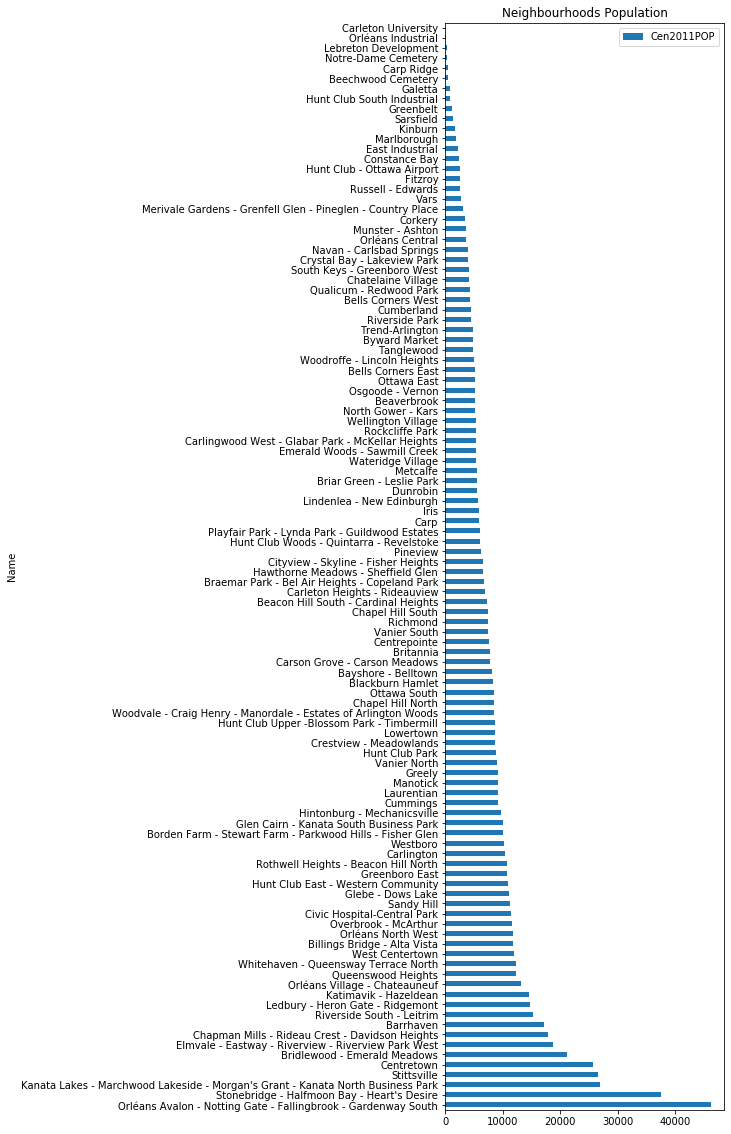

In [19]:
#plot in a bar graph
Neigh_data2.sort_values(by='Cen2011POP', inplace =True,ascending=False)
#Neigh_dataTop5= Neigh_data2.head(5)
ax1 = Neigh_data2.plot.barh(x='Name', y='Cen2011POP',title="Neighbourhoods Population", 
                              figsize=(5,20))
ax1


### Top 5 populated neighbourhoods are: 
1. Orléans Avalon - Notting Gate - Fallingbrook - Gardenway South
2. Stonebridge - Halfmoon Bay - Heart's Desire
3. Kanata Lakes - Marchwood Lakeside - Morgan's Grant- Kanata North Business Park
4. Stittsville
5. Centretown

# 3. Ottawa's Asian Population data by ward
Unfortunately, there was no data by neighbourhood.
This data will be used to determine the areas in Ottawa where there is the highest Asian population.  

Source: http://data.ottawa.ca/group/demographics

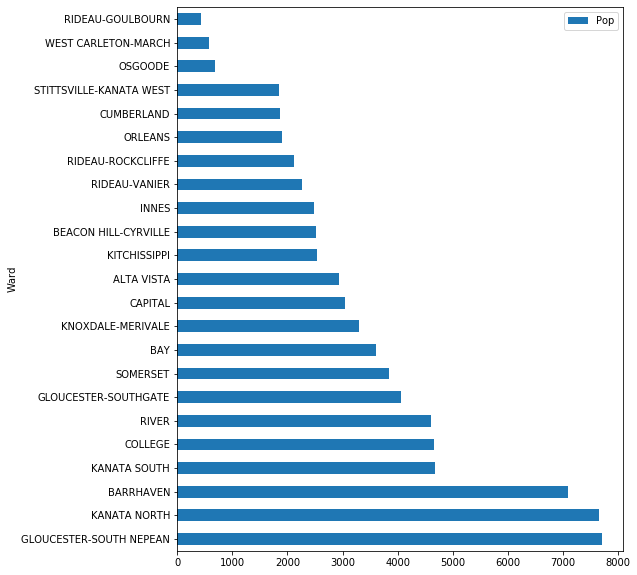

In [21]:
AsianPop= pd.read_excel('capstone\Ward\Asian pop.xls',sheet_name="Sheet2")
AsianPop.sort_values(by='Pop', inplace =True, ascending=False)
ax = AsianPop.plot.barh(x='Ward', y='Pop', figsize=(8,10))
ax

### Top 5 wards with the most Asian population:
1. Gloucester-South Nepean
2. Kanata North
3. Barrhaven
4. Kanata South
5. College


## 3.1 Map of Ottawa with Neighbourhood & Ward Boundaries and Neighbourhood  & Asian Population


In [22]:
#merge Asian population data with Ward data
Ward_data2=Ward_data1.merge(AsianPop, left_on='DESCRIPTIO', right_on='Ward', how='right').fillna(0)
Ward_data2=Ward_data2.sort_values(by='Pop', ascending=True)
Ward_data2.head()


,DESCRIPTIO,WARD_NUM,type,coordinates,Ward n,Pop,Ward
0,RIDEAU-GOULBOURN,21,Polygon,"[[[-75.7987234317951, 45.2926922409098, 4.5474...",Ward 21,425,RIDEAU-GOULBOURN
21,WEST CARLETON-MARCH,5,Polygon,"[[[-76.0870582202826, 45.5183388951525, 4.5474...",Ward 5,585,WEST CARLETON-MARCH
5,OSGOODE,20,Polygon,"[[[-75.5101104901342, 45.3162835244267, 4.5474...",Ward 20,695,OSGOODE
2,STITTSVILLE-KANATA WEST,6,Polygon,"[[[-75.9172516833851, 45.2977389592523, 0.0001...",Ward 6,1845,STITTSVILLE-KANATA WEST
22,CUMBERLAND,19,Polygon,"[[[-75.320299225068, 45.5005110120412, 4.54747...",Ward 19,1865,CUMBERLAND


In [56]:
Ward_data2_dict = Ward_data2.set_index('DESCRIPTIO')['Pop']

In [181]:
# Make a data frame with dots to show on the map
HighPopNeighMarkers = pd.DataFrame({
'lat':[-75.725556, -75.925036],
'lon':[45.268099, 45.348915],
'name':['Stonebridge - Halfmoon Bay - Hearts Desire', 
        'Kanata Lakes - Marchwood Lakeside - Morgans Grant- Kanata North Business Park']
})

#Ottawa's Geocoordinates:
latitude = 45.201106
longitude = -75.690308

colormap = linear.YlGn_09.scale(
    Neigh_data2.Cen2011POP.min(),
    Neigh_data2.Cen2011POP.max())
colormap.caption = "2011 Population by Neighbourhood"

colormap2 = linear.PuRd_09.scale(
    Ward_data2.Pop.min(),
    Ward_data2.Pop.max())
colormap2.caption = "2011 Asian Population by Ward"

map_Ott = folium.Map(location=[latitude, longitude], zoom_start=10)

style = {'fillColor': '#ffffff', 'color': '#3339ff', 'weight': 0.9}
style1 = {'fillColor': '#ffffff', 'color': '#e33e1b', 'weight': 1}

folium.GeoJson(OttawaJson,
    name='Neighbourhoods',
    style_function=lambda x: style).add_to(map_Ott)

folium.GeoJson(
    OttawaJson,
    name='Neighpop',
    style_function=lambda feature: {
        'fillColor': colormap(NeighPop_dict[feature['properties']['NAMES']]), 
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(map_Ott)


#for i in range(0,len(HighPopNeighMarkers)):
#    folium.Marker([HighPopNeighMarkers.iloc[i]['lon'], HighPopNeighMarkers.iloc[i]['lat']], 
#                  popup=HighPopNeighMarkers.iloc[i]['name']).add_to(map_Ott)


folium.GeoJson(WardJson,
    name='Ward',
    style_function=lambda x: style1
).add_to(map_Ott)

folium.GeoJson(
    WardJson,
    name='AsianPopByWard',
    style_function=lambda feature: {
        'fillColor': colormap2(Ward_data2_dict[feature['properties']['DESCRIPTIO']]), 
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(map_Ott)

colormap.add_to(map_Ott)
colormap2.add_to(map_Ott)

folium.LayerControl(autoZIndex=False, collapsed=False).add_to(map_Ott)
map_Ott.save('capstone\workbook\images\map3_nomark.html')

### Map of Ottawa
Included:
- Asian population density has been added to the map (in red)
- Neighbourhood markers:'Stonebridge - Halfmoon Bay - Hearts Desire' (Stonebridge) and 'Kanata Lakes - Marchwood Lakeside - Morgans Grant- Kanata North Business Park' (Kanata Lakes)
<img src="images/map3.jpg">

In [7]:
#IFrame(src='capstone\workbook\images\map3.html', width=850, height=600)

>*Once the Asian population density by ward was added, it became clear to see that the Stonebridge and Kanata Lakes neighbourhoods carry the highest population and holds the most Asians*

# 4. Restaurant Data from Foursquare

**Parameters for the Foursquare API**
1. Latitude / longitude coordinates.  
    A number of lat/long coordinates across Ottawa were used. [1]
2. Radius: 10,000.
3. Query = "food".

   [1]  *Ottawa Postal Code Coordinates data can be found at https://open.canada.ca/data/en/dataset/515dbfa9-9069-4877-8fe8-177edaa4ca76*


### Map of Ottawa with the selected Latitude / longitude coordinates
Below is a map displaying all the points (lat/long coordinates) that will be used in the Foursquare API.  
 

In [23]:
OttData= pd.read_csv('capstone/RedOttawaPCLatLng.csv')
# create map of Ottawa using latitude and longitude values
map_Ott = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, n in zip(OttData['Latitude'], OttData['Longitude'], OttData['FSA'],):
    label = '{},{},{}'.format(n,lat,lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Ott)  
    
map_Ott

>*Observations: The points are fairly evenly spread out in areas of development (i.e. no dense clusters of blue dots).*  
  
    

## 4.1 Collecting 'Food' Venues Data from Foursquare 
Below is the code used to pull the data for food venues. The code was run multiple times as there was an API limit. Each iteration was saved and combined into one file _(Restaurants2.csv)_. 


In [120]:
#ID, keys have been removed 
CLIENT_ID = 'GBYHRELS0D253V5QVTU0L5OIM3AVO04U2YNGAND3I22VPFAM' # your Foursquare ID
CLIENT_SECRET = 'MRVSW1DPQGGUL21KSHWUBRJV0RT5KTD0L4P1MGJXVKFV51S3' # your Foursquare Secret
VERSION = '20190710'

In [ ]:
#due to the limits, this code was ran a few times with different sets lat / long
def getNearbyVenues(names, latitudes, longitudes, radius=10000, query='Food', limit=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name,lat,lng)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            limit,
            query)
           
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            print ('na')
            pass
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['formattedAddress'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'VID',  
                  'Venue', 
                  'Address',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

venues = getNearbyVenues(names=OttData['FSA'],
                         latitudes=OttData['Latitude'],
                         longitudes=OttData['Longitude']
                        )
#saved the dataset (venues1-venues5)
#venues.to_csv (r'capstone/venues5.csv',index=False, header = True)

#files were combimed into Restaurants2.csv

## 4.2 Explore and Understand Data

In [131]:
#Import saved dataset
Restaurants= pd.read_csv('capstone/Restaurants2.csv')
print('The shape of the venues dataframe:',Restaurants.shape)
print('There are {} uniques categories.'.format(len(Restaurants['Venue Category'].unique())))
Restaurants.head()

The shape of the venues dataframe: (561, 6)
There are 62 uniques categories.


,VID,Venue,Address,Lat,Long,Venue Category
0,4a8c96faf964a5209f0e20e3,Summerhays Bar & Grill,"['1971 Baseline Rd (at Woodroffe Ave)', 'Ottaw...",45.352146,-75.761954,Diner
1,4b0586def964a5204b7222e3,Brookstreet Café,"['525 Legget Drive', 'Kanata ON K2K 2W2', 'Can...",45.347984,-75.917971,Café
2,4b0586def964a5204d7222e3,The French Baker,"['119 Murray St (at Dalhousie St)', 'Ottawa ON...",45.430282,-75.692531,Bakery
3,4b0586def964a5204f7222e3,D'Arcy McGee's Ottawa,"['44 Sparks St (at Elgin St)', 'Ottawa ON K1P ...",45.423509,-75.695824,Irish Pub
4,4b0586def964a5205b7222e3,Little India Cafe,"['66 Wylie Ave (Carling Ave)', 'Ottawa ON K2B ...",45.355179,-75.806858,Indian Restaurant


### 4.2.1 Types of Ottawa Food Venues

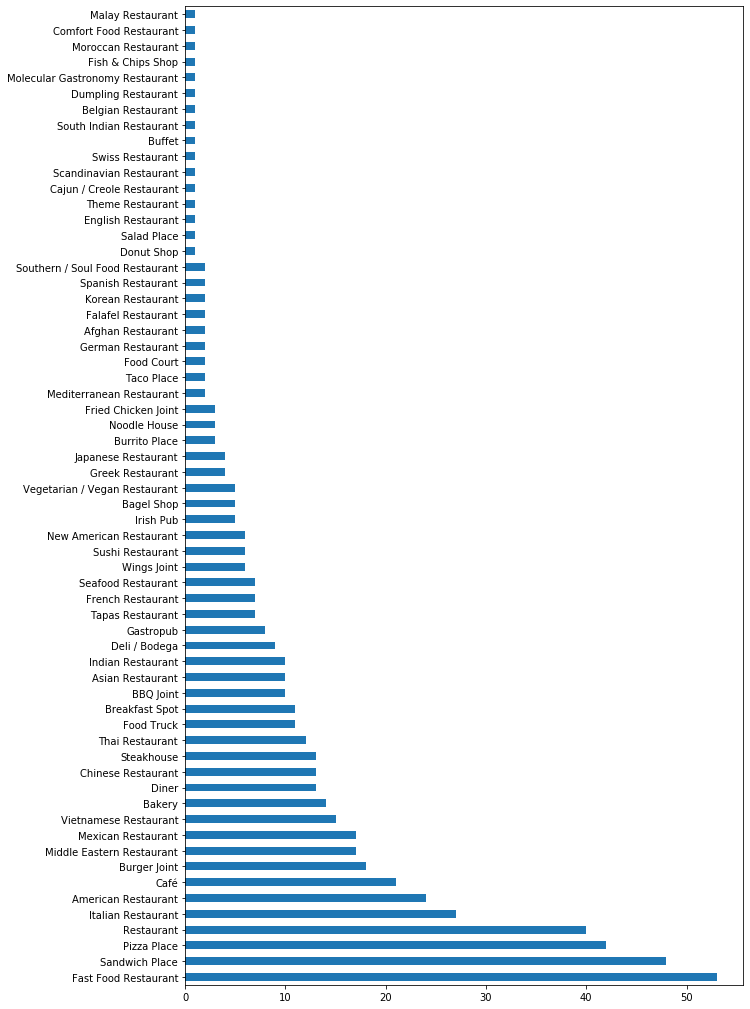

In [129]:
Restaurants['Venue Category'].value_counts().plot(kind='barh',figsize=(10,18))

>Ottawa is mainly dominated by fast food restaurants, sandwich and pizza places.

### 4.2.2 Ottawa Restaurants Visualization

In [112]:
# create map of Ottawa using latitude and longitude values
map_Ott = folium.Map(location=[latitude, longitude], zoom_start=12)

style = {'fillColor': '#ffffff', 'color': '#3339ff', 'weight': 0.9}

folium.GeoJson(OttawaJson,
    name='geojson',
    style_function=lambda x: style).add_to(map_Ott)


# add markers to map  Venue Latitude = Lat ; Venue Longitude = Long
for lat, lng, v in zip(Restaurants['Lat'], Restaurants['Long'], Restaurants['Venue'],):
    label = '{}'.format(v)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        name='markers',
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#f01c1c',
        fill_opacity=0.7,
        weight =0.5,
        
        parse_html=False).add_to(map_Ott)  
folium.LayerControl().add_to(map_Ott)

map_Ott.save('capstone\workbook\images\mapA.html')

### Map of Ottawa with food venues
<img src="images/mapA.jpg">

In [25]:
#IFrame(src='capstone\workbook\images\mapA.html', width=850, height=900)

> As expected, downtown Ottawa has the highest concentration of food venues.

# 5. Collecting Asian Restaurant Details from Foursquare
Using the venue categories, the following were identified to be considered as an "Asian Restaurant"
   - Asian Restaurant
   - Chinese Restaurant
   - Japanese Restaurant
   - Korean Restaurant
   - Noodle House
   - Sushi Restaurant
   - Thai Restaurant
   - Vietnamese Restaurant
   
Specific venue data gathered: Venue ID, Ratings, Stats, Price, Likes.

A new dataframe (Asian Restaurants) is created using these venue categories.

In [152]:
#generating a subset of restaurants from the Restaurants dataframe
Type = ['Asian Restaurant','Chinese Restaurant','Japanese Restaurant','Korean Restaurant','Noodle House','Sushi Restaurant','Thai Restaurant','Vietnamese Restaurant']

#Asian = Restaurants['Venue Category']isin(Type)
Asian = Restaurants[Restaurants['Venue Category'].isin(Type)]

#gapminder.year.isin(years)

print('The shape of the venues dataframe:',Asian.shape)

#Asian.to_csv (r'Documents/Coursera - IBM data science/capstone/Rest_Asian.csv',index=False, header = True)


The shape of the venues dataframe: (65, 6)


In [153]:
#reload dataset
Asian= pd.read_csv('capstone/Rest_Asian.csv')
Asian.head()

,VID,Venue,Address,Lat,Long,Venue Category
0,4b0586e1f964a520007322e3,Yangtze Restaurant 楊子江酒家,"['700 Somerset St W (Cambridge St N)', 'Ottawa...",45.410975,-75.706934,Chinese Restaurant
1,4b0586e1f964a520047322e3,Genji Japanese Restaurant,"['175 Lisgar St (between Metcalfe and Elgin)',...",45.418981,-75.692465,Japanese Restaurant
2,4b0586e1f964a520057322e3,Rideau Restaurant,"['500 Eagleson Road', 'Ottawa ON K2M 1H4', 'Ca...",45.290844,-75.870379,Chinese Restaurant
3,4b07316af964a5204ef922e3,Banc Sushi,"['919 Montreal Rd', 'Ottawa ON', 'Canada']",45.446851,-75.629165,Japanese Restaurant
4,4b079ac1f964a520ecfe22e3,Baan Thai,"['261 Centrepointe', 'Ottawa ON', 'Canada']",45.339084,-75.771651,Thai Restaurant


## 5.1 Asian Restaurants Visualization

In [218]:
# create map of Ottawa using latitude and longitude values
Map_Asian = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map  Venue Latitude = Lat ; Venue Longitude = Long
for lat, lng, v in zip(Asian['Lat'], Asian['Long'], Restaurants['Venue'],):
    label = '{}'.format(v)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Map_Asian)  
    

Map_Asian.save('capstone\workbook\images\Map_Asian.html')

### Map of Ottawa with Asian food venues
<img src="images/Map_Asian.jpg">

In [31]:
#IFrame(src='capstone\workbook\images\Map_Asian.html', width=800, height=500)

### Asian restaurants within restaurant density map

In [221]:
from folium import FeatureGroup, LayerControl, Map, Marker


from folium.plugins import HeatMap


folium.GeoJson(OttawaJson,
    name='Neighbourhoods',
    style_function=lambda x: style).add_to(Map_Asian)




#folium.LayerControl().add_to(Map_Asian)
#colormap.add_to(Map_Asian)

xmap = HeatMap( zip(Restaurants.Lat.values, Restaurants.Long.values),
                     min_opacity=0.2,
                     radius=13, blur=15,
                     max_zoom=5
                 )
Map_Asian.add_child(xmap)

folium.LayerControl(autoZIndex=False, collapsed=False).add_to(Map_Asian)

Map_Asian.save('capstone\workbook\images\Map_AsianHeat.html')

<img src="images/Map_AsianHeat.jpg">

In [28]:
#IFrame(src='capstone\workbook\images\Map_AsianHeat.html', width=800, height=800)

>The heatmap indicates the areas with the most concentrated restaurants. A blue dot represent an Asian restaurant. It seems that most Asian restaurants tend to be located in higher concentrated restaurant areas (spots that are red).

>Kanata area seems to have a higher concentration in restaurants than the Stonebridge area. 

## 5.2 Collect Restaurant Venues Details from Foursquare 
Below, is the code to retrieve the Foursquare data. Due to the limitations of the Foursquare API, the code had to be run multiple times. All data was collected and combined into one file.

In [ ]:
def getRatings(VID,V):
    count = 0
    venues_ratings=[]
    for ID, VenueName in zip(VID,V):
        count = count +1
        
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            ID,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
           
        # make the GET request
        try:
            results = requests.get(url).json()["response"]
            print (results)
        except:
            print ('Bad', count,VenueName, ID)
            pass
        
        try:
            r=results['venue']['rating']
        except:
            r=None
        try:
            stat=results['venue']['stats']['tipCount']
        except:
            stat=None
        try:
            url=results['venue']['url']
        except:
            url=None
        try:
            hours=results['venue']['hours']
        except:
            hours=None
        try:
            popular=results['venue']['popular']
        except:
            popular=None
        try:
            menue=results['venue']['menue']
        except:
            menue=None
        try:
            price=results['venue']['price']['tier']
        except:
            price=None
        try:
            likes=results['venue']['likes']['count']
        except:
            likes=None
        try:
            phrases=results['phrases']
        except:
            phrases=None
        try:
            twitter=results['venue']['contact']['twitter']
        except:
            twitter=None
        try:
            instagram=results['venue']['contact']['instagram']
        except:
            instagram=None     
        try:
            facebook=results['venue']['contact']['facebook']
        except:
            facebook=None   
            
            # return only relevant information for each nearby venue
        venues_ratings.append([
                ID, 
                r,
                stat,
                url,
                hours,
                popular,
                menue,
                price,
                likes,
                phrases,
                twitter,
                instagram,
                facebook])
        print(count,VenueName, ID,r,facebook)

        if count == 50:
            break
            
            
    rates = pd.DataFrame (venues_ratings)
    #rates = pd.DataFrame([item for venue_rating in venues_ratings for item in venue_rating])
    rates.columns = ['VId','Rating','Stats','URL','Hours','Popular','Menue', 'Price', 'Likes','Phrases','Twitter','Insta','FB']
         
    return(rates)


In [ ]:
Ratings = getRatings(VID = Asian['VID'], V = Asian['Venue'])

In [249]:
#saved the dataset (Ratings1-Ratings3)
#Ratings.to_csv (r'capstone/Ratings3.csv',index=False, header = True)

Ratings= pd.read_csv('capstone/Ratings_final.csv')
Ratings.set_index (["VId"],inplace=True)
print('Data collected from Foursquare')
Ratings.head()

Data collected from Foursquare


,Rating,Stats,URL,Hours,Popular,Menue,Price,Likes,Phrases,Twitter,Insta,FB
VId,,,,,,,,,,,,
4b0586e1f964a520007322e3,7.5,26,http://www.yangtze.ca,NaN,"{'isOpen': False, 'isLocalHoliday': False, 'ti...",NaN,4,43,NaN,NaN,NaN,NaN
4b0586e1f964a520047322e3,8.6,19,http://genji.ca,"{'status': 'Open until 2:30 AM', 'richStatus':...","{'status': 'Likely open', 'richStatus': {'enti...",NaN,4,41,NaN,NaN,NaN,NaN
4b0586e1f964a520057322e3,NaN,4,NaN,NaN,NaN,NaN,1,3,NaN,NaN,NaN,NaN
4b07316af964a5204ef922e3,6.4,10,NaN,NaN,"{'isOpen': False, 'isLocalHoliday': False, 'ti...",NaN,2,15,NaN,NaN,NaN,NaN
4b079ac1f964a520ecfe22e3,7.3,9,NaN,NaN,NaN,NaN,2,11,NaN,NaN,NaN,NaN


In [251]:
#Asian= pd.read_csv('capstone/Rest_Asian.csv')
Asian.set_index(["VID"],inplace=True)
Asian.head()

,Venue,Address,Lat,Long,Venue Category
VID,,,,,
4b0586e1f964a520007322e3,Yangtze Restaurant 楊子江酒家,"['700 Somerset St W (Cambridge St N)', 'Ottawa...",45.410975,-75.706934,Chinese Restaurant
4b0586e1f964a520047322e3,Genji Japanese Restaurant,"['175 Lisgar St (between Metcalfe and Elgin)',...",45.418981,-75.692465,Japanese Restaurant
4b0586e1f964a520057322e3,Rideau Restaurant,"['500 Eagleson Road', 'Ottawa ON K2M 1H4', 'Ca...",45.290844,-75.870379,Chinese Restaurant
4b07316af964a5204ef922e3,Banc Sushi,"['919 Montreal Rd', 'Ottawa ON', 'Canada']",45.446851,-75.629165,Japanese Restaurant
4b079ac1f964a520ecfe22e3,Baan Thai,"['261 Centrepointe', 'Ottawa ON', 'Canada']",45.339084,-75.771651,Thai Restaurant


#### Merge Venue and Rating Data 

In [257]:
AsianRest = pd.concat([Asian, Ratings], axis=1, join='inner')
AsianRest.reset_index() 
AsianRest.head()
#save dataset
#AsianRest.to_csv (r'capstone/Ratings_final.csv',index=False, header = True)

,Venue,Address,Lat,Long,Venue Category,Rating,Stats,URL,Hours,Popular,Menue,Price,Likes,Phrases,Twitter,Insta,FB
4b0586e1f964a520007322e3,Yangtze Restaurant 楊子江酒家,"['700 Somerset St W (Cambridge St N)', 'Ottawa...",45.410975,-75.706934,Chinese Restaurant,7.5,26,http://www.yangtze.ca,NaN,"{'isOpen': False, 'isLocalHoliday': False, 'ti...",NaN,4,43,NaN,NaN,NaN,NaN
4b0586e1f964a520047322e3,Genji Japanese Restaurant,"['175 Lisgar St (between Metcalfe and Elgin)',...",45.418981,-75.692465,Japanese Restaurant,8.6,19,http://genji.ca,"{'status': 'Open until 2:30 AM', 'richStatus':...","{'status': 'Likely open', 'richStatus': {'enti...",NaN,4,41,NaN,NaN,NaN,NaN
4b0586e1f964a520057322e3,Rideau Restaurant,"['500 Eagleson Road', 'Ottawa ON K2M 1H4', 'Ca...",45.290844,-75.870379,Chinese Restaurant,NaN,4,NaN,NaN,NaN,NaN,1,3,NaN,NaN,NaN,NaN
4b07316af964a5204ef922e3,Banc Sushi,"['919 Montreal Rd', 'Ottawa ON', 'Canada']",45.446851,-75.629165,Japanese Restaurant,6.4,10,NaN,NaN,"{'isOpen': False, 'isLocalHoliday': False, 'ti...",NaN,2,15,NaN,NaN,NaN,NaN
4b079ac1f964a520ecfe22e3,Baan Thai,"['261 Centrepointe', 'Ottawa ON', 'Canada']",45.339084,-75.771651,Thai Restaurant,7.3,9,NaN,NaN,NaN,NaN,2,11,NaN,NaN,NaN,NaN


# 6. Clustering For Competitor Insight

### Clean Ratings

In [356]:
Ratings= pd.read_csv('capstone/Ratings_final.csv')
#replace all Ratings with Na to -1
Ratings['Rating'].fillna(-1,inplace=True)
Ratings['URL'].fillna(0,inplace=True)
Ratings['URL']=Ratings['URL'].apply(lambda x: 1 if x!=0 else 0)

Ratings['Twitter'].fillna(0,inplace=True)
Ratings['Twitter']=Ratings['Twitter'].apply(lambda x: 1 if x!=0 else 0)

Ratings['Insta'].fillna(0,inplace=True)
Ratings['Insta']=Ratings['Insta'].apply(lambda x: 1 if x!=0 else 0)

Ratings['FB'].fillna(0,inplace=True)
Ratings['FB']=Ratings['FB'].apply(lambda x: 1 if x!=0 else 0)

Ratings.rename(columns={'VId': 'VID'}, inplace=True)

Ratings['OnlineP'] = Ratings['FB']+ Ratings['Twitter']+ Ratings ['Insta'] + Ratings['URL']

Ratings2 = Ratings[['VID','Rating','Stats','Price','Likes','OnlineP']]
Ratings2.head()

,VID,Rating,Stats,Price,Likes,OnlineP
0,4b0586e1f964a520007322e3,7.5,26,4,43,1
1,4b0586e1f964a520047322e3,8.6,19,4,41,1
2,4b0586e1f964a520057322e3,-1.0,4,1,3,0
3,4b07316af964a5204ef922e3,6.4,10,2,15,0
4,4b079ac1f964a520ecfe22e3,7.3,9,2,11,0


### Modeling

In [357]:
# set number of clusters
kclusters = 5

Ratings3 = Ratings2.drop('VID', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Ratings3)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 4, 3, 3, 3, 0, 3, 2, 3])

In [358]:
# add clustering labels
Ratings2.insert(0, 'Cluster Labels', kmeans.labels_)
Ratings2.head()

,Cluster Labels,VID,Rating,Stats,Price,Likes,OnlineP
0,2,4b0586e1f964a520007322e3,7.5,26,4,43,1
1,2,4b0586e1f964a520047322e3,8.6,19,4,41,1
2,4,4b0586e1f964a520057322e3,-1.0,4,1,3,0
3,3,4b07316af964a5204ef922e3,6.4,10,2,15,0
4,3,4b079ac1f964a520ecfe22e3,7.3,9,2,11,0


In [359]:
Ratings_merged = Ratings2[['Cluster Labels','VID']]

Ratings_merged.set_index (["VID"],inplace=True)

Ratings_merged1 = pd.concat([Asian, Ratings_merged], axis=1, join='inner')
Ratings_merged1.reset_index() 
Ratings_merged1.head()

,Venue,Address,Lat,Long,Venue Category,Cluster Labels
VID,,,,,,
4b0586e1f964a520007322e3,Yangtze Restaurant 楊子江酒家,"['700 Somerset St W (Cambridge St N)', 'Ottawa...",45.410975,-75.706934,Chinese Restaurant,2
4b0586e1f964a520047322e3,Genji Japanese Restaurant,"['175 Lisgar St (between Metcalfe and Elgin)',...",45.418981,-75.692465,Japanese Restaurant,2
4b0586e1f964a520057322e3,Rideau Restaurant,"['500 Eagleson Road', 'Ottawa ON K2M 1H4', 'Ca...",45.290844,-75.870379,Chinese Restaurant,4
4b07316af964a5204ef922e3,Banc Sushi,"['919 Montreal Rd', 'Ottawa ON', 'Canada']",45.446851,-75.629165,Japanese Restaurant,3
4b079ac1f964a520ecfe22e3,Baan Thai,"['261 Centrepointe', 'Ottawa ON', 'Canada']",45.339084,-75.771651,Thai Restaurant,3


### Insights

In [373]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

folium.GeoJson(OttawaJson,
    name='Neighbourhoods',
    style_function=lambda x: style).add_to(map_clusters)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, c,poi, cluster in zip(Ratings_merged1['Lat'], Ratings_merged1['Long'], Ratings_merged1['Venue Category'],Ratings_merged1['Venue'], Ratings_merged1['Cluster Labels']):
    label = folium.Popup(str(poi) + str(c)+'[' + str(cluster)+']', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='black',
        #fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       


map_clusters.save('capstone\workbook\images\map_clusters.html')


<img src="images/map_clusters.jpg">

In [30]:
#IFrame(src='capstone\workbook\images\map_clusters.html', width=800, height=600)

In [368]:
Ratings2.groupby('Cluster Labels').mean(numeric_only=True)

,Rating,Stats,Price,Likes,OnlineP
Cluster Labels,,,,,
0,7.0750,4.875000,2.041667,6.041667,0.375000
1,8.2500,33.000000,1.500000,64.500000,1.500000
2,8.0125,19.750000,2.625000,37.500000,1.125000
3,7.3250,10.750000,1.833333,15.083333,0.541667
4,-1.0000,1.857143,1.571429,1.714286,0.000000


>Cluster 0 (Red) : Rating 7+, Low Stats, Price: 2 , Low Likes, Low online presence
Cluster 1 (Purple): Rating 8+, High Stats, Price:1.5 , High Likes, High online presence    
Cluster 2 (Blue): Rating 8+, Moderate Stats, Price: +2.5, Moderate Likes, High online presence  
Cluster 3 (Mint): Rating 7+, Low/Moderate Stats, Price: 1.8, Low/Moderate likes, Low online presence 
Cluster 4 (Orange): No rating, Low stats, Price: 1.5, Low likes, No online presence


>*Kanata Lakes:*   
> In the neighbourhood, there are 3 restaurants. 2 of the 3 restaurants have no rating with very low stats, no online presences, low amount of likes. The other restaurant seems to have a rating of 7+ with moderate stats, low online presence and low/moderate amount of likes. All 3 restaurants tend to have more affordable pricing.    
>
>However, the nearby neighbourhoods have more competition. These neighbouring restaurants may be priced a bit higher but have higher ratings, in general. Kanata Noodle House, in particular, has a rating of 8.5 with moderate pricing.

>*Stonebridge:*    
> There are only a few Asian restuarants in this neighbourhood. One of these restaurants has no rating and little to no online presences (no website and does not belong to any social media group). The other 2 have a 7+ rating with some online presence. The menu prices at these restaurant tend to be moderate.     
>
>There are no nearby neighbourhoods with Asian restaurants.

In [347]:
Ratings2.loc[Ratings2['Cluster Labels'] == 0, Ratings2.columns[[1] + list(range(2, Ratings2.shape[1]))]]

,VID,Rating,Stats,URL,Price,Likes,SocialMedia
6,4b257442f964a520357224e3,5.8,7,0,2,5,0
13,4b71e38df964a5205f622de3,6.4,10,1,2,7,0
15,4b7acda1f964a520933d2fe3,7.3,4,1,2,4,0
19,4b9d583ef964a52060a536e3,8.1,9,0,1,6,0
20,4bae8bedf964a5203cbf3be3,6.2,5,0,1,4,0
23,4bdc7e382a3a0f474318b3b6,7.3,4,0,2,6,0
24,4c240005136d20a18d31e161,8.1,6,1,2,5,1
27,4c3c9129b36ac928f23f0486,7.3,5,0,2,4,0
28,4c62e53579d1e21ead3ad715,7.6,4,1,2,8,0
29,4c65d6ba7abde21e55f66168,7.3,1,0,2,7,0


In [342]:
Ratings2.loc[Ratings2['Cluster Labels'] == 1, Ratings2.columns[[1] + list(range(2, Ratings2.shape[1]))]]

,VID,Rating,Stats,URL,Price,Likes,SocialMedia
33,4d3f389100e8a35d20d8effa,7.5,42,0,2,62,0
47,5739fdb2498ea29b0ec70f01,9.0,24,1,1,67,2


In [369]:
Ratings2.loc[Ratings2['Cluster Labels'] == 2, Ratings2.columns[[1] + list(range(2, Ratings2.shape[1]))]]

,VID,Rating,Stats,Price,Likes,OnlineP
0,4b0586e1f964a520007322e3,7.5,26,4,43,1
1,4b0586e1f964a520047322e3,8.6,19,4,41,1
8,4b301515f964a520bff524e3,8.1,21,3,37,1
18,4b92a494f964a520e70c34e3,7.6,18,1,34,0
26,4c2a97398ef52d7fe82930ba,8.7,12,2,37,1
30,4cab9a1f44a8224b423f2f40,6.7,25,3,28,0
46,5643f00d498ece71742b531e,8.4,19,2,41,2
61,4f6a6d70e4b01cb02d90f748,8.5,18,2,39,3


In [344]:
Ratings2.loc[Ratings2['Cluster Labels'] == 3, Ratings2.columns[[1] + list(range(2, Ratings2.shape[1]))]]

,VID,Rating,Stats,URL,Price,Likes,SocialMedia
3,4b07316af964a5204ef922e3,6.4,10,0,2,15,0
4,4b079ac1f964a520ecfe22e3,7.3,9,0,2,11,0
5,4b242619f964a520356224e3,6.2,14,0,1,13,0
7,4b26d0b3f964a520588124e3,6.9,18,1,2,24,0
9,4b38ebe6f964a520435225e3,7.2,12,0,2,15,0
10,4b4e5af4f964a520a0ea26e3,8.7,17,1,2,21,1
11,4b549bfdf964a52084c227e3,7.0,11,0,2,12,0
12,4b709de3f964a5207c252de3,7.7,12,1,2,17,1
14,4b774960f964a520f78e2ee3,7.8,8,1,1,11,0
17,4b7c323ef964a520bf832fe3,5.4,13,0,1,13,0


In [346]:
Ratings2.loc[Ratings2['Cluster Labels'] == 4, Ratings2.columns[[1] + list(range(2, Ratings2.shape[1]))]]

,VID,Rating,Stats,URL,Price,Likes,SocialMedia
2,4b0586e1f964a520057322e3,-1.0,4,0,1,3,0
16,4b7b4ac1f964a520d45c2fe3,-1.0,1,0,1,0,0
21,4bb23c8635f0c9b64d00bb83,-1.0,2,0,2,1,0
32,4d2f344cda7cb60c8bd275d4,-1.0,1,0,2,1,0
34,4e5fda8c62e16ff820fc643a,-1.0,2,0,1,2,0
63,5a4fb0da2105c341d0355969,-1.0,2,0,2,2,0
64,59358753ad1ea474c511bce7,-1.0,1,0,2,3,0
